# Spectrum fits

Several places (Perley & Butler, give log polynomials in GHz)

$Log(S) = A + B\times(log(\nu)) + C\times(log(\nu))^2 +D\times(log(\nu))^3$

But I want 

$Log(S) = a + b\times(log(F)) + c\times(log(F))^2 +d\times(log(F))^3$

Where F is in MHz

In [48]:
from sympy import *
A,B,C,D,v,a,b,c,d,f=symbols('A,B,C,D,v,a,b,c,d,f')
"""
$v =log(\nu)$
f=log(f)

"""
#f=v+3
#v=f-3
expr=poly(A+ B*(f-3) +C*(f-3)**2 +D*(f-3)**3)

 

In [49]:
 print expr

Poly(f**3*D + f**2*C - 9*f**2*D + f*B - 6*f*C + 27*f*D + A - 3*B + 9*C - 27*D, f, A, B, C, D, domain='ZZ')


In [50]:
simplify(expr)

Poly(f**3*D + f**2*C - 9*f**2*D + f*B - 6*f*C + 27*f*D + A - 3*B + 9*C - 27*D, f, A, B, C, D, domain='ZZ')

# recast

* a=A -3*B + 9*C  -27*D
* b=B -6*C +27*D
* c=C -9*D
* d=D

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def toM(A,B,C,D):
    a=A -3*B + 9*C  -27*D
    b=B -6*C +27*D
    c=C -9*D
    d=D
    return(a,b,c,d)

In [53]:
def toG(a,b,c,d):
    A=a +3*b +9*c +27*d
    B=b +6*c +27*d
    C=c +9*d
    D=d
    return(A,B,C,D)

In [54]:
x3c48=toM(1.3253,-0.7553,-0.1914,0.0498) #PB2016
x3c138=toM(1.0088,-0.4981,-0.155,0.010)
x3c286=toM(1.2361,-0.4127,-0.1864,0.0294)
print("3C48 %6.4f %6.4f %6.4f %6.4f") %(x3c48)
print("3C138 %6.4f %6.4f %6.4f %6.4f") %(x3c138)
print("3C286 %6.4f %6.4f %6.4f %6.4f") %(x3c286)

3C48 0.5240 1.7377 -0.6396 0.0498
3C138 0.8381 0.7019 -0.2450 0.0100
3C286 0.0028 1.4995 -0.4510 0.0294


In [55]:
p3c138=toG(-1.6220,3.0577,-0.9585,0.0787)
print p3c138
p3c48=toG(-0.2292,2.4917,-0.8949,0.0787)
print p3c48
p3c286=toG(2.1566,-0.3588,0.0745,-0.0193)
print p3c286


(1.0495, -0.5684, -0.2502, 0.0787)
(1.3167, -0.7528000000000006, -0.1866, 0.0787)
(1.2296, -0.43290000000000006, -0.09920000000000002, -0.0193)


In [56]:
def p48(f):
    n=f-3
    s=1.3253 -0.7553*n  -0.1914*n**2 +0.0498*n**3
    return s
def x48(f):
    s=-0.2292+2.4917*f -0.8949*f**2 +0.0787*f**3
    return s
def  o48(f):
    s=2.465 -0.004*f -0.1251*f**2 #Ott
    return s

In [57]:
def scaife48(f):
    off=np.log10(150.)
    x=f-off
    a0=np.log10(64.768)
    a1=-0.387
    a2=-0.420
    a3=0.181
    s=a0+a1*x +a2*x**2 +a3*x**3
    return s

In [58]:
def fakep48(f):
    A=1.3253
    B=-0.7553
    C=-0.1914
    D=0.0498
    a=A -3*B +9*C -27*D
    b=B -6*C+27*D
    c=C -9*D
    d=D
    print a,b,c,d
    s=a + b*f +c*f**2 +d*f**3
    return s 
    

0.524 1.7377 -0.6396 0.0498


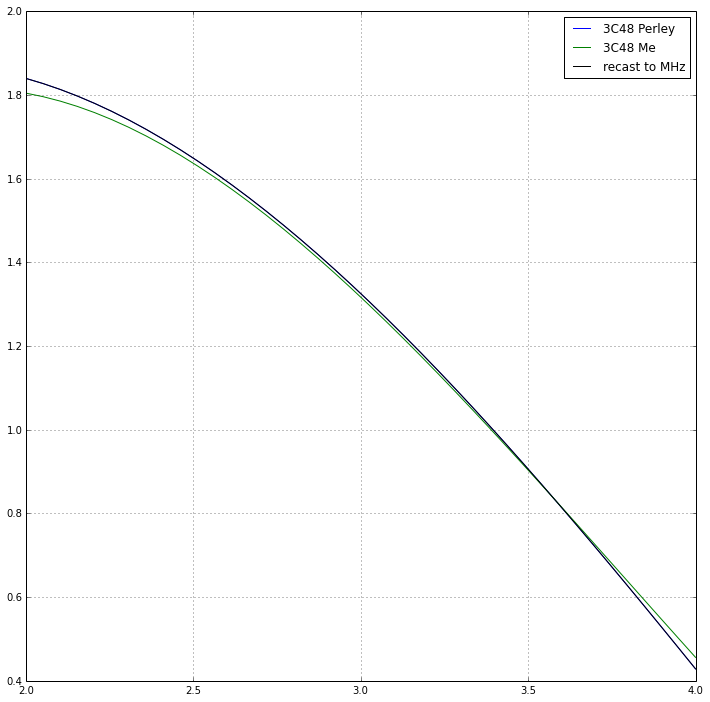

In [59]:
f=np.linspace(2.,4,40)
plt.figure(figsize=(12,12))
plt.plot(f,p48(f),label="3C48 Perley")
plt.plot(f,x48(f),label="3C48 Me")
plt.plot(f,fakep48(f),label="recast to MHz",color='k')
#plt.plot(f,scaife48(f),label="Scaife")
plt.grid()
plt.legend()
plt.show()

In [66]:
def p138(f):
    n=f-3
    s=1.0088-0.4981*n -0.155*n**2 -0.010 *n**3 # Perley-butler 2016
    return s
def x138(f):
    s=-1.6220 +3.0577*f -0.9585*f**2 +0.0787*f**3
    return s
def fake138(f):
    A=1.0088
    B=-0.4981
    C=-0.155
    D=-0.010
    a=A -3*B +9*C -27*D
    b=B -6*C+27*D
    c=C -9*D
    d=D
    print a,b,c,d
    s=a + b*f +c*f**2 +d*f**3
    return s 
    

1.3781 0.1619 -0.065 -0.01


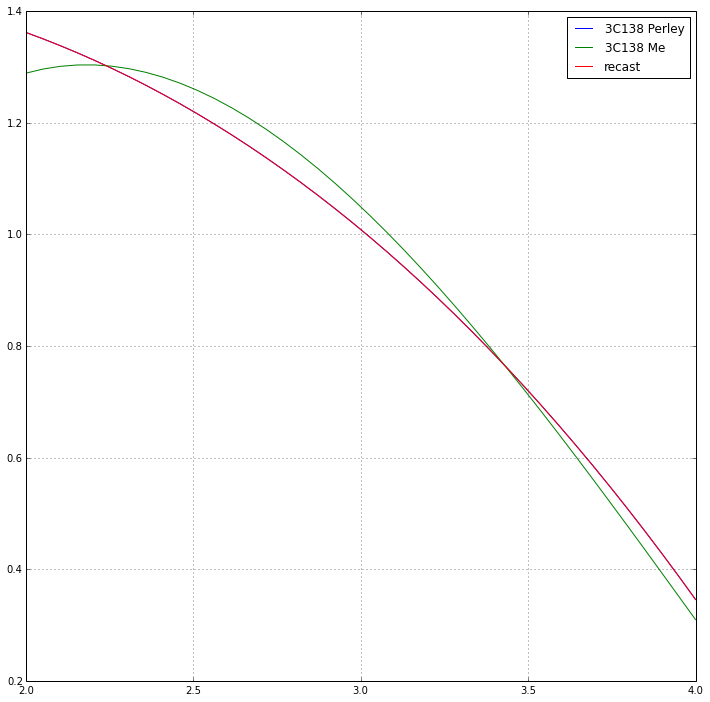

In [67]:
f=np.linspace(2.,4,40)
plt.figure(figsize=(12,12))
plt.plot(f,p138(f),label="3C138 Perley")
plt.plot(f,x138(f),label="3C138 Me")
plt.plot(f,fake138(f),label="recast")
plt.grid()
plt.legend()
plt.show()

In [78]:
def p286(f):
    n=f-3
    s=1.2481 -0.4507*n -0.1798*n**2 +0.0357*n**3  # Perley-Butler 2016
    return s
def x286(f):
    s=2.1566 -0.3588*f +0.0745*f**2 -0.0193*f**3
    return s
def o286(f):
    s=0.958 + 0.584*f -0.1644*f**2 # Ott
    return s
def fake286(f):
    A=1.2481
    B=-0.4507
    C=-0.1798
    D=0.0357
    a=A -3*B +9*C -27*D
    b=B -6*C+27*D
    c=C -9*D
    d=D
    print a,b,c,d
    s=a + b*f +c*f**2 +d*f**3
    return s 

def v2(f):
    s=1.3987 +0.1911*f -0.0512*f**2 -0.010*f**3
    return s

In [79]:
def scaife286(f):
    off=np.log10(150.)
    x=f-off
    a0=np.log10(27.477)
    a1=-0.158
    a2=0.032
    a3=-0.180
    s=a0+a1*x +a2*x**2 +a3*x**3
    return s

0.0181 1.592 -0.5011 0.0357


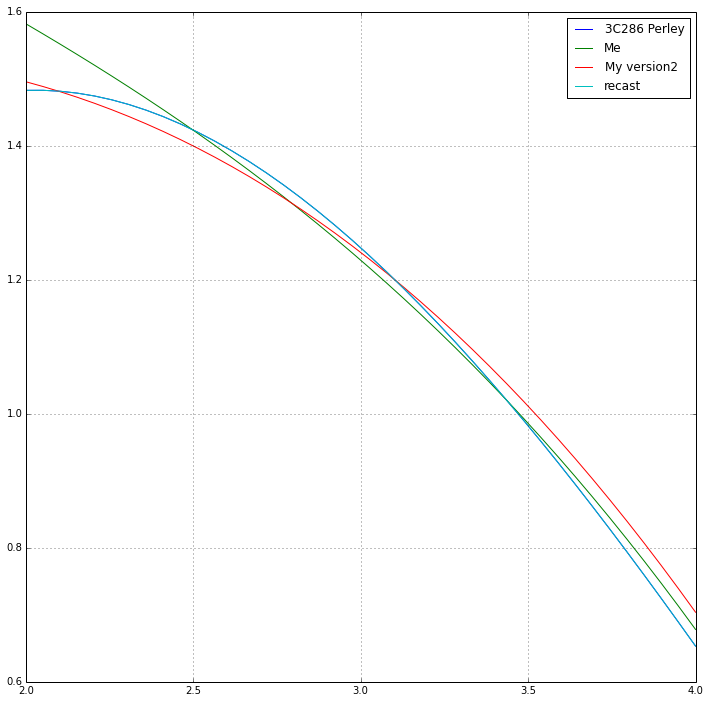

In [80]:
f=np.linspace(2.,4,40)
plt.figure(figsize=(12,12))
plt.plot(f,p286(f),label="3C286 Perley")
plt.plot(f,x286(f),label="Me")
#plt.plot(f,scaife286(f),label="Scaife")
plt.plot(f,v2(f),label="My version2")
plt.plot(f,fake286(f),label="recast")
plt.legend()
plt.grid()
plt.show()

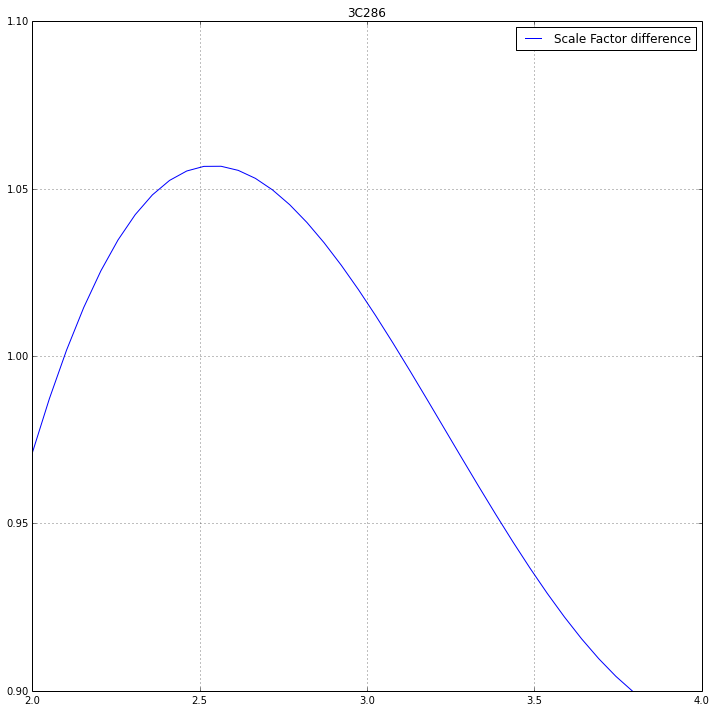

In [82]:
f=np.linspace(2.,4,40)
plt.figure(figsize=(12,12))
plt.plot(f,10**(p286(f)-v2(f)) ,label="Scale Factor difference")
plt.legend()
plt.ylim(0.9,1.1)
plt.title("3C286")
plt.grid()
plt.show()